In [14]:
from llm.LLMModel import *
from ner.llm_ner.prompt_techniques.pt_abstract import PromptTechnique
from ner.llm_ner.prompt_techniques.pt_discussion import PT_OutputList
from ner.llm_ner.prompt_techniques.pt_gpt_ner import PT_GPT_NER
from ner.llm_ner.prompt_techniques.pt_gpt_ner import PT_GPT_NER
from ner.llm_ner.prompt_techniques.pt_wrapper import PT_Wrapper
from ner.llm_ner.few_shots_techniques import *
from ner.llm_ner.ResultInstance import load_all_results, load_result
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2

In [17]:

df_results = load_all_results(root_directory = "ner/saves/results/ontonote5/mistral-7b-v0.1/")

/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: 

In [22]:
df_to_show = df_results[['f1_mean', 'f1_conf_inter', 'prompt_technique',
       'few_shot_tecnique', 'nb_few_shots', 'precision', 'plus_plus']]

df_to_show[df_to_show['precision'] == '300']

,f1_mean,f1_conf_inter,prompt_technique,few_shot_tecnique,nb_few_shots,precision,plus_plus
14,0.323,"(0.297, 0.350)",wrapper,sentence,3,300,True
15,0.321,"(0.275, 0.367)",wrapper,sentence,3,300,False
18,0.246,"(0.216, 0.275)",multi_prompt-get-entities-tagger,sentence,3,300,True
3,0.238,"(0.202, 0.274)",discussion,sentence,3,300,True
19,0.238,"(0.205, 0.271)",multi_prompt-get-entities-tagger,sentence,3,300,False
4,0.236,"(0.194, 0.277)",discussion,sentence,3,300,False
8,0.161,"(0.132, 0.191)",filing,sentence,3,300,True
9,0.152,"(0.098, 0.205)",filing,sentence,3,300,False
1,0.119,"(0.103, 0.135)",discussion,no-shots,0,300,True
2,0.110,"(0.100, 0.119)",discussion,no-shots,0,300,False


## Show results for finetuned models

In [98]:

df_results['finetuned'] = df_results['model'].map(lambda s : 'ft' in s)
df_results['nb_samples_tested'] = df_results['nb_test_run'] * df_results['len_data_test']
ft_results = df_results[df_results['finetuned']]
ft_results = ft_results[['f1_mean', 'f1_conf_inter', 'prompt_technique', 'model', 'noshots', 'few_shot_tecnique','nb_few_shots', 'nb_samples_tested']]
ft_results['model_base'] = ft_results['model'].map(lambda s : '-'.join(s.split('-')[:-4]))
ft_results['nb_train_samples'] = ft_results['model'].map(lambda s : s.split('-')[-2])
ft_results = ft_results.sort_values(['prompt_technique',	'few_shot_tecnique', 'f1_mean'], ascending=False)

In [99]:
# ['f1_mean', 'f1_conf_inter', 'prompt_technique', 'few_shot_tecnique',
    #    'nb_few_shots', 'nb_samples_tested', 'model_base', 'nb_train_samples',
    #    'finetuned']
grouped = ft_results.groupby(['prompt_technique', 'few_shot_tecnique', 'noshots', 
       'nb_few_shots', 'nb_samples_tested', 'model_base', 'nb_train_samples'])
grouped 

idx_max = grouped['f1_mean'].idxmax()

ft_cleaned = ft_results.loc[idx_max].sort_values('nb_train_samples', ascending=False)

df = ft_cleaned#[ft_cleaned['nb_samples_tested'] == 500]
# Create dummy columns for 'few_shot_tecnique'
df.pivot(index=['model_base','prompt_technique','noshots',
        'nb_train_samples','nb_samples_tested'], columns='few_shot_tecnique', values= 'f1_mean')

few_shot_tecnique                                                               entity  \
model_base         prompt_technique noshots nb_train_samples nb_samples_tested           
mistral-7b-v0.1    discussion       False   10000            200                 0.779   
                                                             500                 0.802   
                                            2000             150                 0.923   
                                                             500                 0.836   
                                    True    10000            500                 0.144   
                                            2000             500                   NaN   
                   wrapper          False   10000            500                 0.468   
                                            2000             500                 0.026   
                                    True    2000             500                   NaN   
                                            5000             500                 0.620   
mistral-7b-v0.1-ft wrapper          True    Q5_0             200                 0.624   

few_shot_tecnique                                                               no-shots  \
model_base         prompt_technique noshots nb_train_samples nb_samples_tested             
mistral-7b-v0.1    discussion       False   10000            200                     NaN   
                                                             500                   0.823   
                                            2000             150                   0.867   
                                                             500                   0.665   
                                    True    10000            500                     NaN   
                                            2000             500                   0.679   
                   wrapper          False   10000            500                   0.363   
                                            2000             500                   0.000   
                                    True    2000             500                   0.641   
                                            5000             500                   0.656   
mistral-7b-v0.1-ft wrapper          True    Q5_0             200                     NaN   

few_shot_tecnique                                                               random  \
model_base         prompt_technique noshots nb_train_samples nb_samples_tested           
mistral-7b-v0.1    discussion       False   10000            200                   NaN   
                                                             500                 0.799   
                                            2000             150                 0.890   
                                                             500                 0.841   
                                    True    10000            500                   NaN   
                                            2000             500                   NaN   
                   wrapper          False   10000            500                 0.445   
                                            2000             500                 0.004   
                                    True    2000             500                   NaN   
                                            5000             500                 0.568   
mistral-7b-v0.1-ft wrapper          True    Q5_0             200                   NaN   

few_shot_tecnique                                                               sentence  
model_base         prompt_technique noshots nb_train_samples nb_samples_tested            
mistral-7b-v0.1    discussion       False   10000            200                   0.754  
                                                             500                   0.732  
                                            2000             150                   0.912  
      

## Show results for non finetuned models

In [56]:
df_results['finetuned'] = df_results['model'].map(lambda s : 'ft' in s)
df_results['nb_samples_tested'] = df_results['nb_test_run'] * df_results['len_data_test']
ft_results = df_results[~df_results['finetuned']]
ft_results = ft_results[['f1_mean', 'f1_conf_inter', 'prompt_technique', 'model', 'noshots', 'few_shot_tecnique','nb_few_shots', 'nb_samples_tested']]
ft_results = ft_results.sort_values(['prompt_technique',	'few_shot_tecnique', 'f1_mean'], ascending=False)

In [71]:
# ['f1_mean', 'f1_conf_inter', 'prompt_technique', 'few_shot_tecnique',
    #    'nb_few_shots', 'nb_samples_tested', 'model_base', 'nb_train_samples',
    #    'finetuned']
ft_results = ft_results[ft_results['model'] != 'none']
grouped = ft_results.groupby([ 'model', 'prompt_technique', 
       'nb_few_shots', 'nb_samples_tested','few_shot_tecnique', ])
grouped 

# idx_max = grouped['f1_mean'].idxmax()
# idx_max

# Create dummy columns for 'few_shot_tecnique'
ft_results.loc[idx_max].pivot(index=['model','prompt_technique', 'nb_few_shots','nb_samples_tested',
        ], columns='few_shot_tecnique', values= 'f1_mean')

few_shot_tecnique                                                                entity  \
model           prompt_technique                 nb_few_shots nb_samples_tested           
llama-2-13b     wrapper                          5            150                 0.506   
mistral-7b-v0.1 @@##                             5            150                 0.379   
                discussion                       5            150                 0.632   
                                                 10           500                 0.371   
                multi_prompt-get-entities-tagger 3            50                    NaN   
                                                              150                   NaN   
                                                              200                   NaN   
                wrapper                          5            150                 0.574   

few_shot_tecnique                                                                no-shots  \
model           prompt_technique                 nb_few_shots nb_samples_tested             
llama-2-13b     wrapper                          5            150                     NaN   
mistral-7b-v0.1 @@##                             5            150                     NaN   
                discussion                       5            150                     NaN   
                                                 10           500                     0.0   
                multi_prompt-get-entities-tagger 3            50                      NaN   
                                                              150                     NaN   
                                                              200                     NaN   
                wrapper                          5            150                     NaN   

few_shot_tecnique                                                                random  \
model           prompt_technique                 nb_few_shots nb_samples_tested           
llama-2-13b     wrapper                          5            150                 0.351   
mistral-7b-v0.1 @@##                             5            150                   NaN   
                discussion                       5            150                 0.504   
                                                 10           500                   NaN   
                multi_prompt-get-entities-tagger 3            50                    NaN   
                                                              150                   NaN   
                                                              200                   NaN   
                wrapper                          5            150                 0.475   

few_shot_tecnique                                                                sentence  
model           prompt_technique                 nb_few_shots nb_samples_tested            
llama-2-13b     wrapper                          5            150                   0.591  
mistral-7b-v0.1 @@##                             5            150                   0.452  
                discussion                       5            150                   0.595  
                                                 10           500                   0.386  
                multi_prompt-get-entities-tagger 3            50                    0.497  
                                                              150                   0.438  
                                                              200                   0.425  
                wrapper                          5            150                   0.691

## Showing prompts 

In [3]:
LLMModel.show_prompts()

./ner/saves/datasets/ontonote5_test_1403.pkl

------------filing-------------------------
---------------------raw---------------------

### SYSTEM : The task is to extract named entities in a sentence.
    The types of the entities have to be one of the OntoNote5 dataset that you can find here : ['CARDINAL', 'ORDINAL', 'WORK_OF_ART', 'PERSON', 'LOC', 'DATE', 'PERCENT', 'PRODUCT', 'MONEY', 'FAC', 'TIME', 'ORG', 'QUANTITY', 'LANGUAGE', 'GPE', 'LAW', 'NORP', 'EVENT'].
### USER : I want you to extract all the named entities in the text and tag them with one of the tag of the OntoNote5 dataset.
### ASSISTANT : What is the format of the output ?
### USER : You will output a json disctionnary that has all the 18 tags as keys and a list of named entities as values assigned to the right key. For example, with the sentence "Japan is the second country that pays \$ 13 for a burger 20 percent more than France" as input. The output should be this dictionnary : {'CARDINAL' : [], 'ORDINAL' : ["secon

## Looking at results of confidence with the tagger

In [68]:
from ner.utils import load

res = load ("ner/saves/results/conll2003_cleaned/mistral-7b-v0.1/multi_prompt-get-entities-tagger/sentence_3_None_1538_50_1_False.pkl")

cm, f1, precision, recall, y_true, y_pred, y_conf= res.res_insts[0].get_scores(with_y = True)
conf = []
for sent in res.res_insts[0].results:
    conf.extend([s[2] for s in sent])

len(y_conf), len(y_true), len(y_pred)
# [i for i, tag in enumerate(y_pred) if tag == 'None']
right = [y_true[i] == y_pred[i] for i in range(len(y_true))]
rand = [i for i in range(len(right))]

In [61]:
from collections import Counter

# Example list
my_list = list(zip(y_conf, right))

# Use Counter to count occurrences
entry_counts = Counter(sorted(my_list))

# Print the counts
for entry, count in entry_counts.items():
    print(f'{entry}: {count} times')

('None', False): 29 times
('high', False): 1 times
('high', True): 4 times
('medium', False): 5 times
('medium', True): 32 times
('medium-high', False): 31 times
('medium-high', True): 34 times
('medium-low', False): 3 times
('n', False): 1 times


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

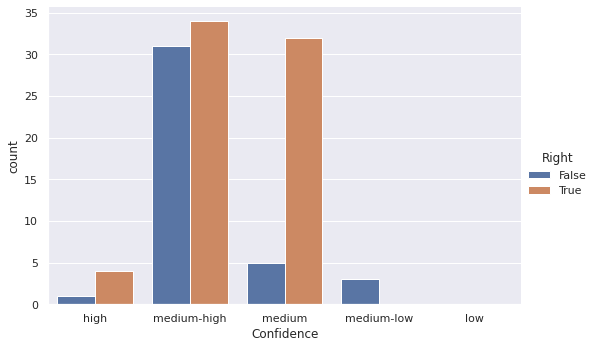

In [89]:
import seaborn as sns
df_conf = pd.DataFrame(np.array([right, y_conf]).T, columns = ['Right', 'Confidence'])

df_conf = pd.DataFrame(df_conf.groupby(['Right', 'Confidence'])['Right'].count()).rename(columns = {'Right' : "count"}).reset_index()
sns.set(rc={'figure.figsize':(10,10)})
order = ['high', 'medium-high', 'medium', 'medium-low', 'low']
sns.catplot(data=df_conf, x="Confidence", y="count", hue="Right", kind="bar",aspect=1.5, order = order)


## Analysing specific result

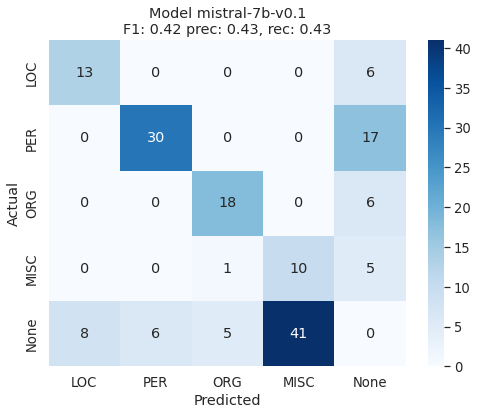

0
[['Brazilians', 'MISC']]
[('Brazilians', 'MISC'), ('Brazil', 'LOC')]
--------------------------------------------
1
[['Livshits', 'PER']]
[('company', 'MISC'), ('Livshits', 'PER')]
--------------------------------------------
2
[]
[('he', 'PER'), ('prime minister', 'ORG')]
--------------------------------------------
3
[['R. Ponting', 'PER'], ['McLean', 'PER']]
[('McLean', 'PER'), ('R. Ponting', 'PER')]
--------------------------------------------
4
[['China', 'LOC'], ['French', 'MISC'], ['Tignes', 'LOC']]
[('World Cup', 'MISC'), ('Tignes', 'LOC'), ('China', 'LOC'), ('Freestyle', 'MISC'), ('Skiing', 'MISC')]
--------------------------------------------
5
[['King Ace', 'MISC'], ['Japan', 'LOC']]
[('King Ace', 'MISC'), ('Japan', 'LOC')]
--------------------------------------------
6
[]
[]
--------------------------------------------
7
[['India', 'LOC'], ['Tony Greig', 'PER'], ['England', 'LOC']]
[('England', 'LOC'), ('Tony Greig', 'PER')]
--------------------------------------------
8


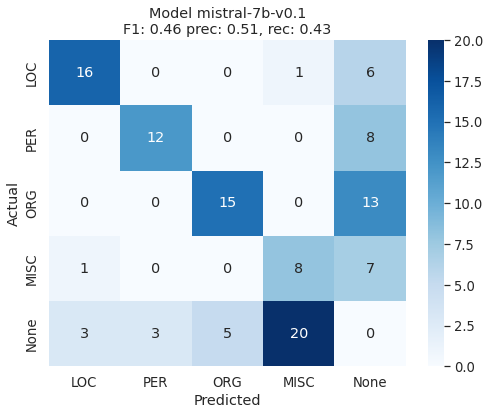

0
[['New York', 'LOC']]
[('New York', 'LOC')]
--------------------------------------------
1
[['BOJ', 'ORG'], ['Reuters', 'ORG']]
[('BOJ', 'ORG'), ('Reuters', 'ORG'), ('Japan', 'LOC')]
--------------------------------------------
2
[['Illinois', 'LOC']]
[('Illinois', 'LOC')]
--------------------------------------------
3
[['New York Commodities', 'ORG']]
[('New York Commodities Desk', 'ORG')]
--------------------------------------------
4
[['Hindu', 'MISC'], ['Bharatiya Janata Party', 'ORG'], ['BJP', 'ORG'], ['pro-Hindu', 'MISC']]
[]
--------------------------------------------
5
[['YIT', 'ORG'], ['Reuters', 'ORG']]
[('YIT', 'ORG')]
--------------------------------------------
6
[['Cooke', 'PER']]
[('toy and gift maker', 'MISC'), ('Cooke', 'PER')]
--------------------------------------------
7
[['Britain I', 'ORG'], ['Sean Olsson', 'PER'], ['Dean Ward', 'PER']]
[]
--------------------------------------------
8
[['MANCHESTER UNITED', 'ORG'], ['AUSTRIA', 'LOC']]
[('Manchester United', 'O

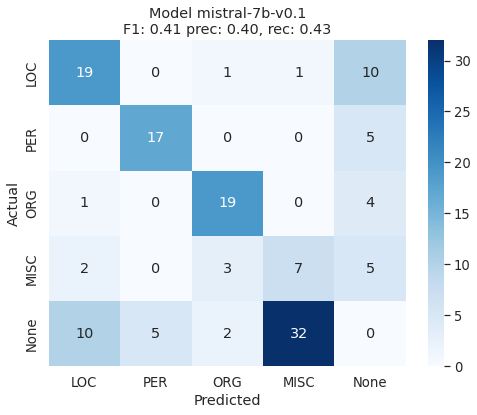

0
[['ICFTU', 'ORG'], ['WTO', 'ORG']]
[('Discrimination', 'MISC'), ('Labour', 'MISC'), ('Child', 'MISC'), ('Monday', 'MISC'), ('Forced', 'MISC'), ('Hiring', 'MISC'), ('ICFTU', 'ORG'), ('Union', 'MISC'), ('WTO', 'ORG')]
--------------------------------------------
1
[['Abdel-Rahman', 'PER'], ['Jewish', 'MISC']]
[('Abdel-Rahman', 'PER'), ('Jewish', 'MISC')]
--------------------------------------------
2
[['U.S.', 'LOC'], ['Italian', 'MISC'], ['Elf', 'ORG']]
[('Elf', 'ORG')]
--------------------------------------------
3
[['New York', 'LOC']]
[('NYMEX', 'ORG')]
--------------------------------------------
4
[['Baril', 'PER'], ['U.S.', 'LOC'], ['British', 'MISC'], ['Bukavu', 'LOC'], ['Kindu', 'LOC']]
[('Masisi', 'LOC'), ('Kindu', 'LOC'), ('U.S.', 'LOC'), ('Bukavu', 'LOC'), ('Baril', 'PER'), ('British', 'MISC')]
--------------------------------------------
5
[['Philadelphia', 'ORG'], ['Green Bay Packers', 'ORG']]
[('Philadelphia', 'LOC'), ('Green Bay Packers', 'ORG')]
-----------------------

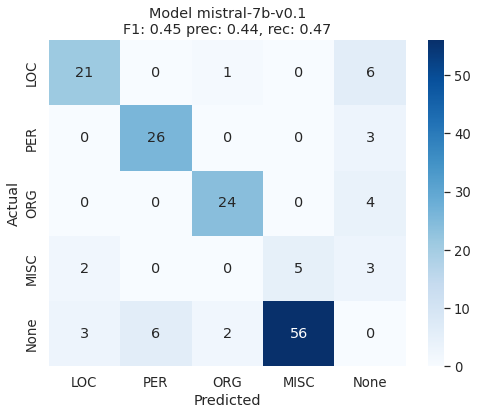

0
[['Italian', 'MISC']]
[('Italian', 'MISC'), ('separatists', 'MISC'), ('President', 'PER')]
--------------------------------------------
1
[['Lanarkshire', 'LOC']]
[('Lanarkshire', 'LOC')]
--------------------------------------------
2
[]
[]
--------------------------------------------
3
[]
[]
--------------------------------------------
4
[['Carlos Ponce', 'PER'], ['Santander', 'LOC']]
[('takes', 'MISC'), ('It', 'MISC'), ('said', 'MISC'), ('Carlos', 'PER'), ('Santander', 'LOC'), ('toll', 'MISC'), ('plunge', 'MISC'), ('a', 'MISC'), (" ' ", 'MISC'), ('director', 'MISC'), ('that', 'MISC'), ('at', 'MISC'), ('research', 'MISC'), ('sudden', 'MISC'), ('s', 'MISC'), ('Ponce', 'PER'), ('its', 'MISC')]
--------------------------------------------
5
[['Japan', 'LOC'], ['Syrian', 'MISC'], ['Syrian', 'MISC']]
[('Syrian', 'LOC'), ('Japan', 'LOC')]
--------------------------------------------
6
[['Brazil', 'LOC']]
[('liposuction', 'MISC'), ('Brazil', 'LOC')]
----------------------------------------

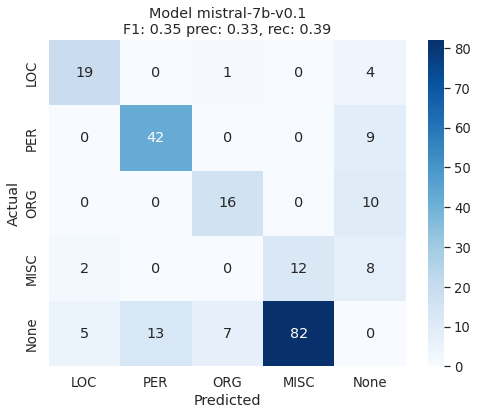

0
[['Honda RV', 'MISC']]
[('RV', 'MISC'), ('Honda', 'ORG')]
--------------------------------------------
1
[]
[('division', 'ORG')]
--------------------------------------------
2
[['Lara', 'PER'], ['Healy', 'PER'], ['Australia', 'LOC']]
[('Australia', 'LOC'), ('Ian Healy', 'PER'), ('Lara', 'PER')]
--------------------------------------------
3
[['Wallabies', 'ORG'], ['European', 'MISC'], ['David Campese', 'PER'], ['Australian', 'MISC']]
[('Wallabies', 'ORG'), ('Australian', 'MISC'), ('David Campese', 'PER')]
--------------------------------------------
4
[['Madlen Brigger-Summermatter', 'PER'], ['Switzerland', 'LOC']]
[]
--------------------------------------------
5
[['Spanish', 'MISC']]
[('legislation', 'MISC'), ('no', 'MISC'), ('known', 'MISC'), ('sports', 'MISC'), ('are', 'MISC'), ('there', 'MISC'), ('precedents', 'MISC'), ('events', 'MISC'), ('action', 'MISC'), ('in', 'MISC'), ('country', 'LOC'), ('the', 'MISC'), ('is', 'MISC'), ('envisaged', 'MISC'), ('Spanish', 'MISC'), ('govern

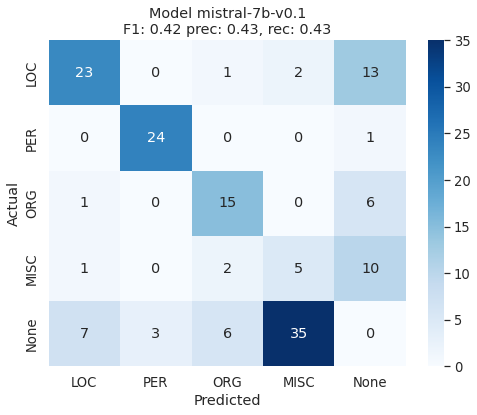

0
[['Zahoor Elahi', 'PER'], ['Cairns', 'PER']]
[('Zahoor Elahi', 'PER'), ('Cairns', 'PER')]
--------------------------------------------
1
[['Australia', 'LOC'], ['Brian Lara', 'PER'], ['West Indies', 'LOC'], ['World Series', 'MISC']]
[('Australia', 'LOC'), ('West Indies', 'LOC'), ('Brian Lara', 'PER')]
--------------------------------------------
2
[]
[('forward', 'MISC'), ('until', 'MISC'), ('children', 'PER'), ('neck', 'MISC'), ('fists', 'MISC'), ('elbows', 'MISC'), ('underneath', 'MISC'), ('in', 'MISC'), ('folded', 'MISC'), ('gaze', 'MISC'), ('still', 'MISC'), ('stand', 'MISC'), ('stray', 'MISC'), ('dog', 'MISC'), ('away', 'MISC'), ('goes', 'MISC'), ('approached', 'MISC')]
--------------------------------------------
3
[['TEMBAU DENPASAR', 'LOC'], ['Bali', 'LOC']]
[('TEMBAU', 'LOC'), ('DENPASAR', 'LOC'), ('Bali', 'LOC')]
--------------------------------------------
4
[['PT Tambang Timah', 'ORG'], ['London', 'LOC'], ['GMT', 'MISC']]
[]
--------------------------------------------
5


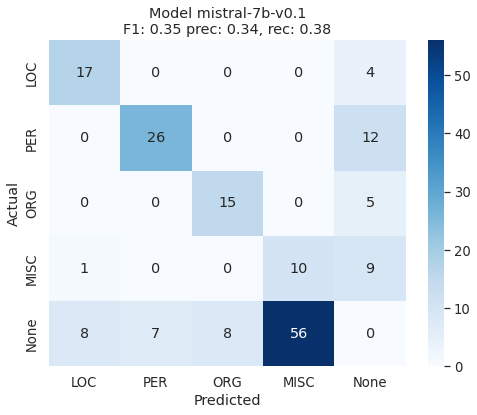

0
[['Mills', 'PER'], ['Lawhon', 'PER']]
[('Mills', 'PER'), ('Lawhon', 'PER')]
--------------------------------------------
1
[['WTO', 'ORG'], ['Singapore', 'LOC'], ['European Union', 'ORG'], ['Singapore', 'LOC']]
[('Singapore', 'LOC'), ('WTO', 'ORG'), ('EU', 'ORG')]
--------------------------------------------
2
[]
[('he', 'PER')]
--------------------------------------------
3
[['Kansas', 'LOC'], ['USDA', 'ORG']]
[]
--------------------------------------------
4
[]
[('technology', 'MISC')]
--------------------------------------------
5
[['France', 'LOC'], ['Canada', 'LOC']]
[]
--------------------------------------------
6
[['Moslem', 'MISC'], ['Blida', 'LOC'], ['Algiers', 'LOC'], ['Algerian', 'MISC']]
[('Algiers', 'LOC'), ('Blida', 'LOC'), ('Algerian', 'MISC'), ('Moslem', 'MISC')]
--------------------------------------------
7
[['Hungarian', 'MISC']]
[('Hungarian', 'LOC'), ('December', 'MISC'), ('payment', 'MISC'), ('deadline', 'MISC'), ('social security', 'MISC'), ('contribution', 'M

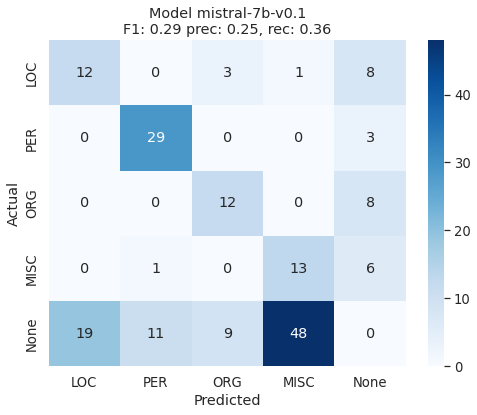

0
[]
[('school', 'LOC')]
--------------------------------------------
1
[['EU', 'ORG'], ['Polish', 'MISC'], ['Europe', 'LOC'], ['EU', 'ORG'], ['Poland', 'LOC']]
[('Agreement', 'ORG'), ('Poland', 'LOC'), ('Europe', 'MISC'), ('EU', 'ORG')]
--------------------------------------------
2
[]
[('Ireland', 'LOC')]
--------------------------------------------
3
[]
[]
--------------------------------------------
4
[]
[('Three', 'MISC')]
--------------------------------------------
5
[['EU', 'ORG'], ['Poland', 'LOC']]
[('Poland', 'LOC'), ('EU', 'ORG')]
--------------------------------------------
6
[['West Indies', 'LOC'], ['Melbourne Cricket Ground', 'LOC'], ['Courtney Walsh', 'PER']]
[('West Indies', 'LOC'), ('Courtney Walsh', 'PER')]
--------------------------------------------
7
[['Sheffield Shield', 'MISC'], ['Tasmania', 'LOC'], ['Victoria', 'LOC'], ['Bellerive Oval', 'LOC']]
[('Bellerive Oval', 'LOC'), ('Tasmania', 'ORG'), ('Sheffield Shield', 'MISC'), ('Victoria', 'ORG')]
----------------

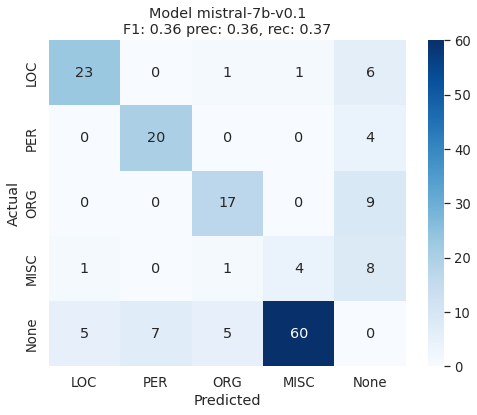

0
[['Swiss', 'MISC'], ['Karin Kuster', 'PER'], ['Evelyne Leu', 'PER']]
[('Evelyne Leu', 'PER'), ('Karin Kuster', 'PER'), ('Swiss', 'LOC')]
--------------------------------------------
1
[]
[]
--------------------------------------------
2
[['Livshits', 'PER']]
[('company', 'MISC'), ('Livshits', 'PER')]
--------------------------------------------
3
[['World Series', 'MISC'], ['West Indies', 'LOC'], ['Australia', 'LOC']]
[('Australia', 'LOC'), ('West Indies', 'LOC')]
--------------------------------------------
4
[['ACCESS', 'MISC']]
[('ACCESS', 'ORG')]
--------------------------------------------
5
[['Grand Rapids', 'LOC'], ['Michigan', 'LOC'], ['Stephenville', 'LOC'], ['Shannon', 'LOC'], ['Ireland', 'LOC']]
[('Stephenville', 'LOC'), ('Michigan', 'LOC'), ('Shannon', 'LOC'), ('Grand Rapids', 'LOC')]
--------------------------------------------
6
[]
[('1997', 'MISC'), ('leaders', 'MISC'), ('Our', 'MISC'), ('countries', 'MISC'), ('March', 'MISC')]
-----------------------------------------

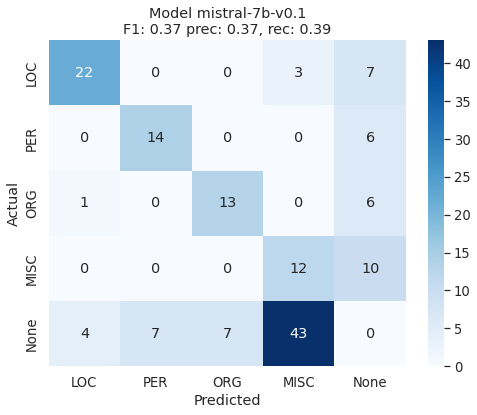

0
[['Umar', 'PER'], ['Bre-X', 'ORG'], ['Barrick', 'ORG'], ['Busang', 'ORG']]
[('Umar', 'PER'), ('Busang', 'LOC'), ('Barrick', 'ORG'), ('Bre-X', 'ORG')]
--------------------------------------------
1
[['RED SEA', 'LOC']]
[]
--------------------------------------------
2
[['Costa', 'PER'], ['AC Milan', 'ORG'], ["European Champions ' League", 'MISC']]
[]
--------------------------------------------
3
[['World Cup', 'MISC'], ['Coste', 'PER']]
[('Coste', 'PER')]
--------------------------------------------
4
[]
[]
--------------------------------------------
5
[['Colombia', 'LOC'], ['El Salvador', 'LOC'], ['Indonesia', 'LOC'], ['Ethiopia', 'LOC'], ['Kenya', 'LOC']]
[('El Salvador', 'LOC'), ('Colombia', 'LOC'), ('Kenya', 'LOC'), ('Ethiopia', 'LOC'), ('Indonesia', 'LOC')]
--------------------------------------------
6
[]
[]
--------------------------------------------
7
[['AECO', 'ORG'], ['C$', 'MISC'], ['Canada', 'LOC']]
[]
--------------------------------------------
8
[]
[]
---------------

In [78]:
model  = "mistral-7b-v0.1"
result = load_result(model, PT_OutputList.name(), FST_Sentence.name(), nb_few_shots= 10, with_precision = "10_True")

for r in result.res_insts :
    r.show_cm()
    r.analyse_results()

In [ ]:
r.f1

In [ ]:
from ner.Datasets.Conll2003Dataset import Conll2003Dataset
from ner.Datasets.MyDataset import MyDataset
data = MyDataset.my_load_dataset(dataset=Conll2003Dataset, split = 'test', cleaned= True)
[(d['text'], d['spans']) for d in data if str(d['spans']) == """[['Switzerland', 'LOC'], ["Alfonse D'Amato", 'PER'], ['U.S. Senate Banking Committee', 'ORG'], ['Poland', 'LOC'], ['Polish', 'MISC'], ['Swiss', 'MISC'], ['Poland', 'LOC']]"""]

In [ ]:
[(d['text'], d['spans']) for d in data if 'Hansenne' in d['text']]